In [ ]:
#importing all necessary libraries 
import pandas as pd
import numpy as np
import sympy as sp
import seaborn as sns 
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
#reading and initializing dataset
dt = pd.read_csv('/content/heart_failur_classification_dataset.csv')
dt


,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,NaN,Male,No,4.0,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136.0,Male,No,6.0,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129.0,Male,Yes,7.0,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137.0,Male,No,7.0,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116.0,Female,No,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,294,62.0,0,61,1,38,1,155000.00,1.1,143.0,Male,Yes,270.0,0
295,295,55.0,0,1820,0,38,0,270000.00,1.2,NaN,Female,No,271.0,0
296,296,45.0,0,2060,1,60,0,742000.00,0.8,138.0,Female,No,278.0,0
297,297,45.0,0,2413,0,38,0,140000.00,1.4,140.0,Male,Yes,280.0,0


In [ ]:
dt.shape

(299, 14)

In [ ]:
#Finding number of null values in the dataset
dt.isnull().sum()

Unnamed: 0                  0
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [ ]:
#dropping unwanted column as it was of no use.
dt = dt.drop(['Unnamed: 0'],axis =1)
dt.shape

(299, 13)

In [ ]:
dt.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                6
sex                         0
smoking                     0
time                        7
DEATH_EVENT                 0
dtype: int64

In [ ]:
#creating subsets 
print("Number of rows with null values in serum_sodium:", dt['serum_sodium'].isnull().sum())
print("Number of rows with null values in time:", dt['time'].isnull().sum())
data_subset = dt[dt['serum_sodium'].notnull()]
print("Shape after removing null values:", data_subset.shape)

Number of rows with null values in serum_sodium: 6
Number of rows with null values in time: 7
Shape after removing null values: (293, 13)


In [ ]:
#removing null values
print('Shape of Dataframe before dropping:', dt.shape)
dt = dt.dropna(axis=0, subset = ['serum_sodium'])
print('Shape of Dataframe after dropping:', dt.shape)

Shape of Dataframe before dropping: (299, 13)
Shape of Dataframe after dropping: (293, 13)


In [ ]:
#creating subset
data_subset = dt[dt['time'].notnull()]
print("Shape after removing null values:", data_subset.shape)

Shape after removing null values: (286, 13)


In [ ]:
#removing null values
print('Shape of Dataframe before dropping:', dt.shape)
dt = dt.dropna(axis=0, subset = ['time'])
print('Shape of Dataframe after dropping:', dt.shape)

Shape of Dataframe before dropping: (293, 13)
Shape of Dataframe after dropping: (286, 13)


In [ ]:
#checking for null values abscenece 
dt.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
#replacing/Encoding string data into numerical
dt['sex'].replace({'Male':1, 'Female':0}, inplace=True)
dt['smoking'].replace({'Yes':1, 'No':0}, inplace=True)


In [ ]:
#determinging features and Lables
X = dt[['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']]
Y = dt[['DEATH_EVENT']]

In [ ]:
#splitting dataset into Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(228, 12)
(58, 12)
(228, 1)
(58, 1)


In [ ]:
scaler = MinMaxScaler() #calling the MinMax scaling algorithm and storing it.
scaler.fit(X_train) #scaling the x training values of the dataset
X_train_scaled = scaler.transform(X_train) #storing the scaled and transformed values of X_train in another varibale
X_test_scaled = scaler.transform(X_test) #storing the scaled and transformed values of X_test in another varibale

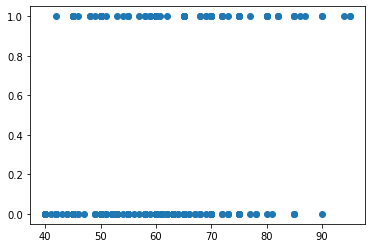

In [ ]:
n=0
plt.scatter (X[X.columns[n]],Y) # where n is the coloumn in X dataset you wish to visualise with your dataset
                                # This is to just let you help visualise your data, its impossible to view the whole dataset together.

In [ ]:
model = LogisticRegression()
model.fit(X_train_scaled, Y_train) #Training our model
predictions = model.predict(X_test_scaled)
print(predictions) #printing prediction

[1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
score1=accuracy_score(Y_test, predictions)
print (score1)

0.8793103448275862


In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy',random_state=1)
clf.fit(X_train,Y_train)
y_pred = clf.predict(X_test)
score2=accuracy_score(y_pred,Y_test)
print(score2)

0.8103448275862069


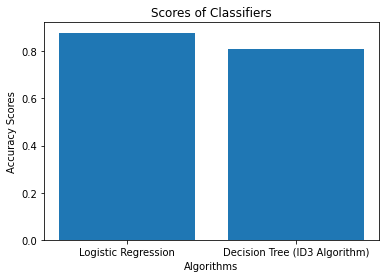

In [ ]:
accuracies = ['Logistic Regression', 'Decision Tree (ID3 Algorithm)']
range = [score1, score2]
plt.bar(accuracies,range)
plt.title('Scores of Classifiers')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy Scores')
plt.show()